In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
norm_a = np.random.normal(10, 3, 1000)
norm_b = np.random.normal(200, 20, 1000)
unif_c = np.random.beta(100, 200, 1000)

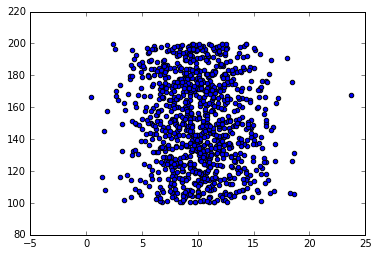

In [35]:
plt.scatter(norm_a, unif_c)

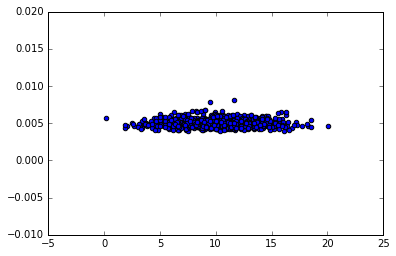

In [22]:
plt.scatter(norm_a, 1/norm_b)

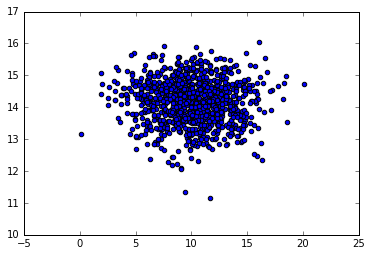

In [30]:
plt.scatter(norm_a, np.sqrt(norm_b) + np.random.normal(.01, .02, 1000))

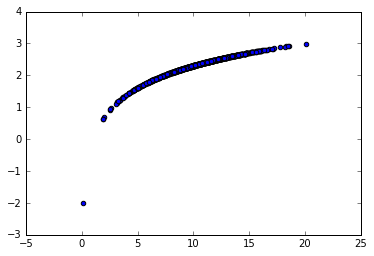

In [27]:
plt.scatter(norm_a, np.log(norm_a))

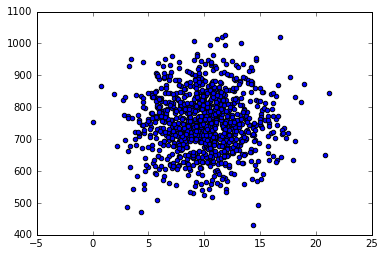

In [46]:
plt.scatter(norm_a, np.sqrt(norm_b**2.5))

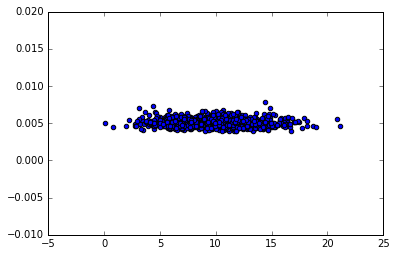

In [63]:
plt.scatter(norm_a, norm_b**(-1))

(array([ 411.,  411.,  127.,   30.,   14.,    3.,    2.,    1.,    0.,    1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 <a list of 10 Patch objects>)

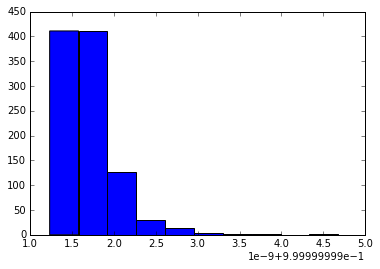

In [66]:
plt.hist(np.exp(norm_b**(-4)))

(array([  23.,  102.,  216.,  279.,  204.,  115.,   40.,   16.,    3.,    2.]),
 array([-22.1884643 , -21.91168484, -21.63490539, -21.35812594,
        -21.08134649, -20.80456703, -20.52778758, -20.25100813,
        -19.97422868, -19.69744922, -19.42066977]),
 <a list of 10 Patch objects>)

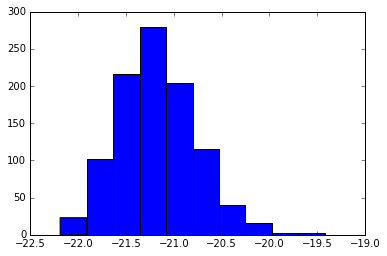

In [58]:
plt.hist(np.log(norm_b**(-4)))

In [70]:
for i in range(10):
    if i % 2 == 0:
        a = i
    print a

0
0
2
2
4
4
6
6
8
8


In [72]:
import pandas as pd

In [75]:
df = pd.read_csv('../datasets/lp_redirects_sample.csv', sep="\t")

In [111]:
def f(val):
    return "%.2f" % (val)

def describe(data):
    columns = [ 'type', 'Nas', '0s', 'min', 'max', 'mean', '.25', '.50', '.75', '.95', 'uniq' ]
    desc    = pd.DataFrame(index=data.columns, columns=columns)
    for c in data.columns:
        if(data[c].dtype == 'object'):
            _0s  = (data[c] == '').sum()
            vals = data[c].value_counts()
            min  = "%s: %d" % ( vals.index[-1], vals.values[-1] )
            max  = "%s: %d" % ( vals.index[ 0], vals.values[ 0] )
            uniq = vals.shape[0]
        else:
            _0s  = (data[c] == 0).sum()
            vals = data[c]
            min  = vals.min()
            max  = vals.max()
            uniq = ''
        _25, _50, _75, _95 = vals.quantile([ .25, .50, .75, .95 ]).apply(f)
        mean, std, cnt, na = vals.mean(), vals.std(), data[c].shape[0] * 1.0,  data[c].isnull().sum()
        desc.loc[c]        = ( data[c].dtype, f(na / cnt), f(_0s / cnt), min, max, f(mean), _25, _50, _75, _95, uniq )
    return desc.sort_values(by='type')

In [112]:
# df = df.drop([ 'seed', 'epoch' ], axis=1)
describe(df)

,type,Nas,0s,min,max,mean,.25,.50,.75,.95,uniq
channel_id,int64,0.00,0.00,2,20,4.71,4.00,4.00,4.00,14.00,
dest_id,int64,0.00,0.00,-3870534,900073884,41277535.70,-749044.00,53.00,1127.00,20133504.00,
weekday,int64,0.00,0.00,3,3,3.00,3.00,3.00,3.00,3.00,
booked_1d,int64,0.00,0.93,0,1,0.07,0.00,0.00,0.00,1.00,
rank,int64,0.00,0.00,1,1,1.00,1.00,1.00,1.00,1.00,
booked_2d,int64,0.00,0.93,0,1,0.07,0.00,0.00,0.00,1.00,
booked_4d,int64,0.00,0.92,0,1,0.08,0.00,0.00,0.00,1.00,
booked_8d,int64,0.00,0.91,0,1,0.09,0.00,0.00,0.00,1.00,
booked_15d,int64,0.00,0.90,0,1,0.10,0.00,0.00,0.00,1.00,
hh,int64,0.00,0.06,0,23,12.90,8.00,14.00,19.00,22.00,
